In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from importlib import reload
import ps.feature as pf

%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
train.head()

,id,target,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
0,7,0,2,2,5,1,0,0,1,0,...,9,1,5,8,0,1,1,0,0,1
1,9,0,1,1,7,0,0,0,0,1,...,3,1,1,9,0,1,1,0,1,0
2,13,0,5,4,9,1,0,0,0,1,...,4,2,7,7,0,1,1,0,1,0
3,16,0,0,1,2,0,0,1,0,0,...,2,2,4,9,0,0,0,0,0,0
4,17,0,0,2,0,1,0,1,0,0,...,3,1,1,3,0,0,0,1,1,0


In [35]:
vec1 = train.ps_ind_02_cat
vec2 = train.ps_ind_04_cat
vec3 = train.ps_car_12
target = train.target

In [24]:
reload(pf)

<module 'ps.feature' from '/home/ryohayama/python_current/porto_seguro/ps/feature.py'>

In [25]:
f1 = pf.CategoricalFeature(vec1, target=target)

In [26]:
print(f1.data)
print(f1.target)

0         2
1         1
2         4
3         1
4         2
5         1
6         1
7         1
8         1
9         1
10        2
11        1
12        1
13        1
14        1
15        1
16        2
17        1
18        1
19        1
20        1
21        1
22        3
23        1
24        1
25        1
26        1
27        1
28        2
29        2
         ..
595182    1
595183    1
595184    1
595185    2
595186    1
595187    1
595188    1
595189    1
595190    2
595191    1
595192    1
595193    2
595194    1
595195    3
595196    1
595197    1
595198    1
595199    1
595200    1
595201    2
595202    1
595203    2
595204    2
595205    3
595206    1
595207    1
595208    1
595209    1
595210    2
595211    1
Name: ps_ind_02_cat, Length: 595212, dtype: int64
0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9         1
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17        0
18

In [27]:
print(f1.num_samples)
print(f1.unique_values)
print(f1.num_unique_values)

595212
[-1, 1, 2, 3, 4]
5


In [28]:
print(f1.value_counts)
print(f1.value_frequencies)
print(f1.feature_type)

 1    431859
 2    123573
 3     28186
 4     11378
-1       216
Name: ps_ind_02_cat, dtype: int64
 1    0.725555
 2    0.207612
 3    0.047355
 4    0.019116
-1    0.000363
Name: ps_ind_02_cat, dtype: float64
categorical


In [29]:
print(f1.contingency_table)
print(f1.frequency_table)
print(f1.conditional_probas)

target              0      1
ps_ind_02_cat               
-1                176     40
 1             416431  15428
 2             118860   4713
 3              27137   1049
 4              10914    464
target                0         1
ps_ind_02_cat                    
-1             0.000296  0.000067
 1             0.699635  0.025920
 2             0.199694  0.007918
 3             0.045592  0.001762
 4             0.018336  0.000780
target         0         1
-1      0.814815  0.185185
 1      0.964275  0.035725
 2      0.961861  0.038139
 3      0.962783  0.037217
 4      0.959220  0.040780


In [30]:
f2 = pf.CategoricalFeature(vec2)

In [31]:
print(f2.data)
print(f2.target)

0         1
1         0
2         1
3         0
4         1
5         0
6         1
7         0
8         1
9         0
10        0
11        1
12        1
13        1
14        0
15        1
16        0
17        0
18        0
19        1
20        0
21        1
22        1
23        1
24        0
25        0
26        1
27        0
28        1
29        0
         ..
595182    0
595183    0
595184    0
595185    1
595186    1
595187    0
595188    0
595189    0
595190    0
595191    0
595192    0
595193    0
595194    1
595195    1
595196    0
595197    1
595198    1
595199    1
595200    0
595201    1
595202    0
595203    1
595204    1
595205    1
595206    0
595207    0
595208    0
595209    0
595210    1
595211    0
Name: ps_ind_04_cat, Length: 595212, dtype: int64
None


In [32]:
print(f2.num_samples)
print(f2.unique_values)
print(f2.num_unique_values)

595212
[-1, 0, 1]
3


In [33]:
print(f2.value_counts)
print(f2.value_frequencies)
print(f2.feature_type)

 0    346965
 1    248164
-1        83
Name: ps_ind_04_cat, dtype: int64
 0    0.582927
 1    0.416934
-1    0.000139
Name: ps_ind_04_cat, dtype: float64
categorical


In [34]:
print(f2.contingency_table)
print(f2.frequency_table)
print(f2.conditional_probas)

None
None
None


In [36]:
f3 = pf.OrdinalFeature(vec3)

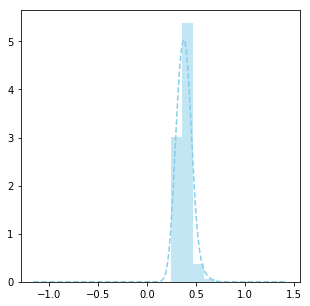

In [42]:
f3.estimateKD(bw=0.055, hist_bins=20)